<h1>Page 25</h1>

In [70]:
# Use this package to read .rda datasets
import pyreadr # pip install pyreader

In [71]:
# Reading a gavote dataset
wcgs = pyreadr.read_r('data/wcgs.rda')['wcgs']

In [72]:
# We start by focusing on just three of the variables in the dataset
wcgs[['chd','height','cigs']].describe(include = 'all')

,chd,height,cigs
count,3154,3154.000000,3154.000000
unique,2,NaN,NaN
top,no,NaN,NaN
freq,2897,NaN,NaN
mean,NaN,69.777743,11.600507
std,NaN,2.528693,14.517579
min,NaN,60.000000,0.000000
25%,NaN,68.000000,0.000000
50%,NaN,70.000000,0.000000
75%,NaN,72.000000,20.000000


In [73]:
# In this chapter we are going to use seaborn library to plot any chart
import seaborn as sns 


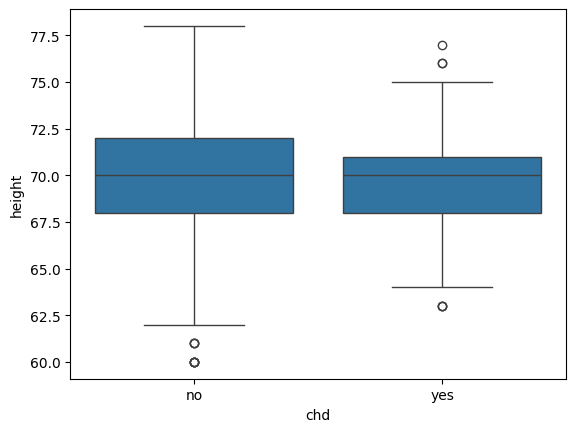

In [74]:
# Plot a boxplot - to show the similarity in the distribution of heights of the two groups of men with and without heart disease
sns.boxplot(data=wcgs,
            x ='chd',
            y = 'height');

In [75]:
# We convert the absence/presence of disease into a numerical 0/1 variable
wcgs['y'] = wcgs['chd'].cat.codes
        

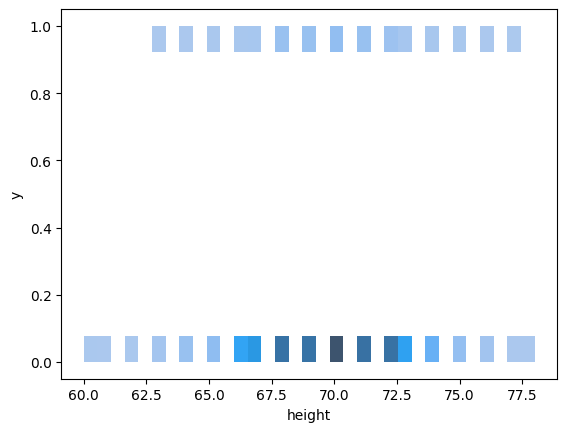

In [76]:
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'height');
        